# Data Analysis for the e-commerce dataset
# Ao Lyu(Lorna)

#### This project embarked on a journey through the vast, vibrant marketplace of Etsy, focusing on the "jewelry" category. Etsy, known for its unique blend of handmade, vintage, and craftwork items, serves as a beacon for those in search of items with a personal touch. This analysis aimed to peel back the layers of product listings to reveal insights into pricing strategies, customer satisfaction, and the marketing tactics employed by sellers, particularly around free shipping offers.

#### And here is the website for the jewelry category in Etsy:
#### https://www.etsy.com/c/jewelry

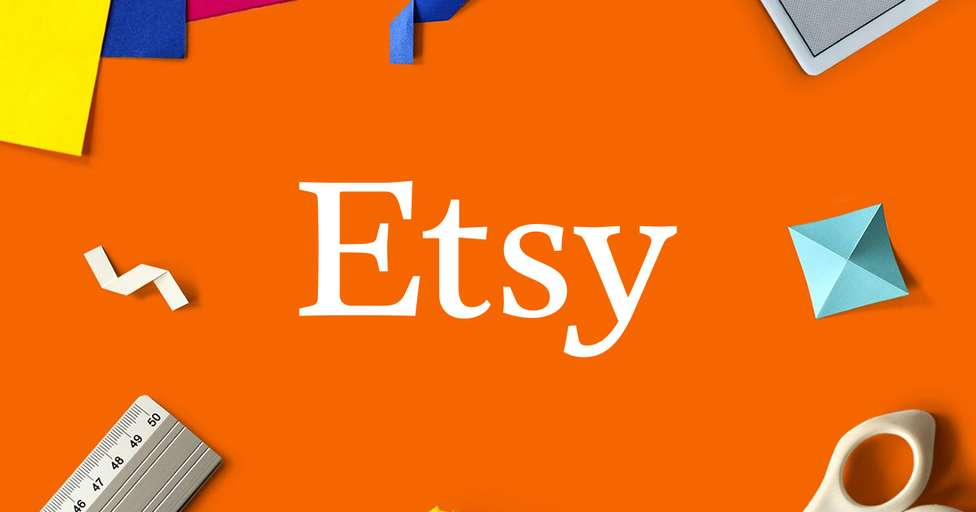

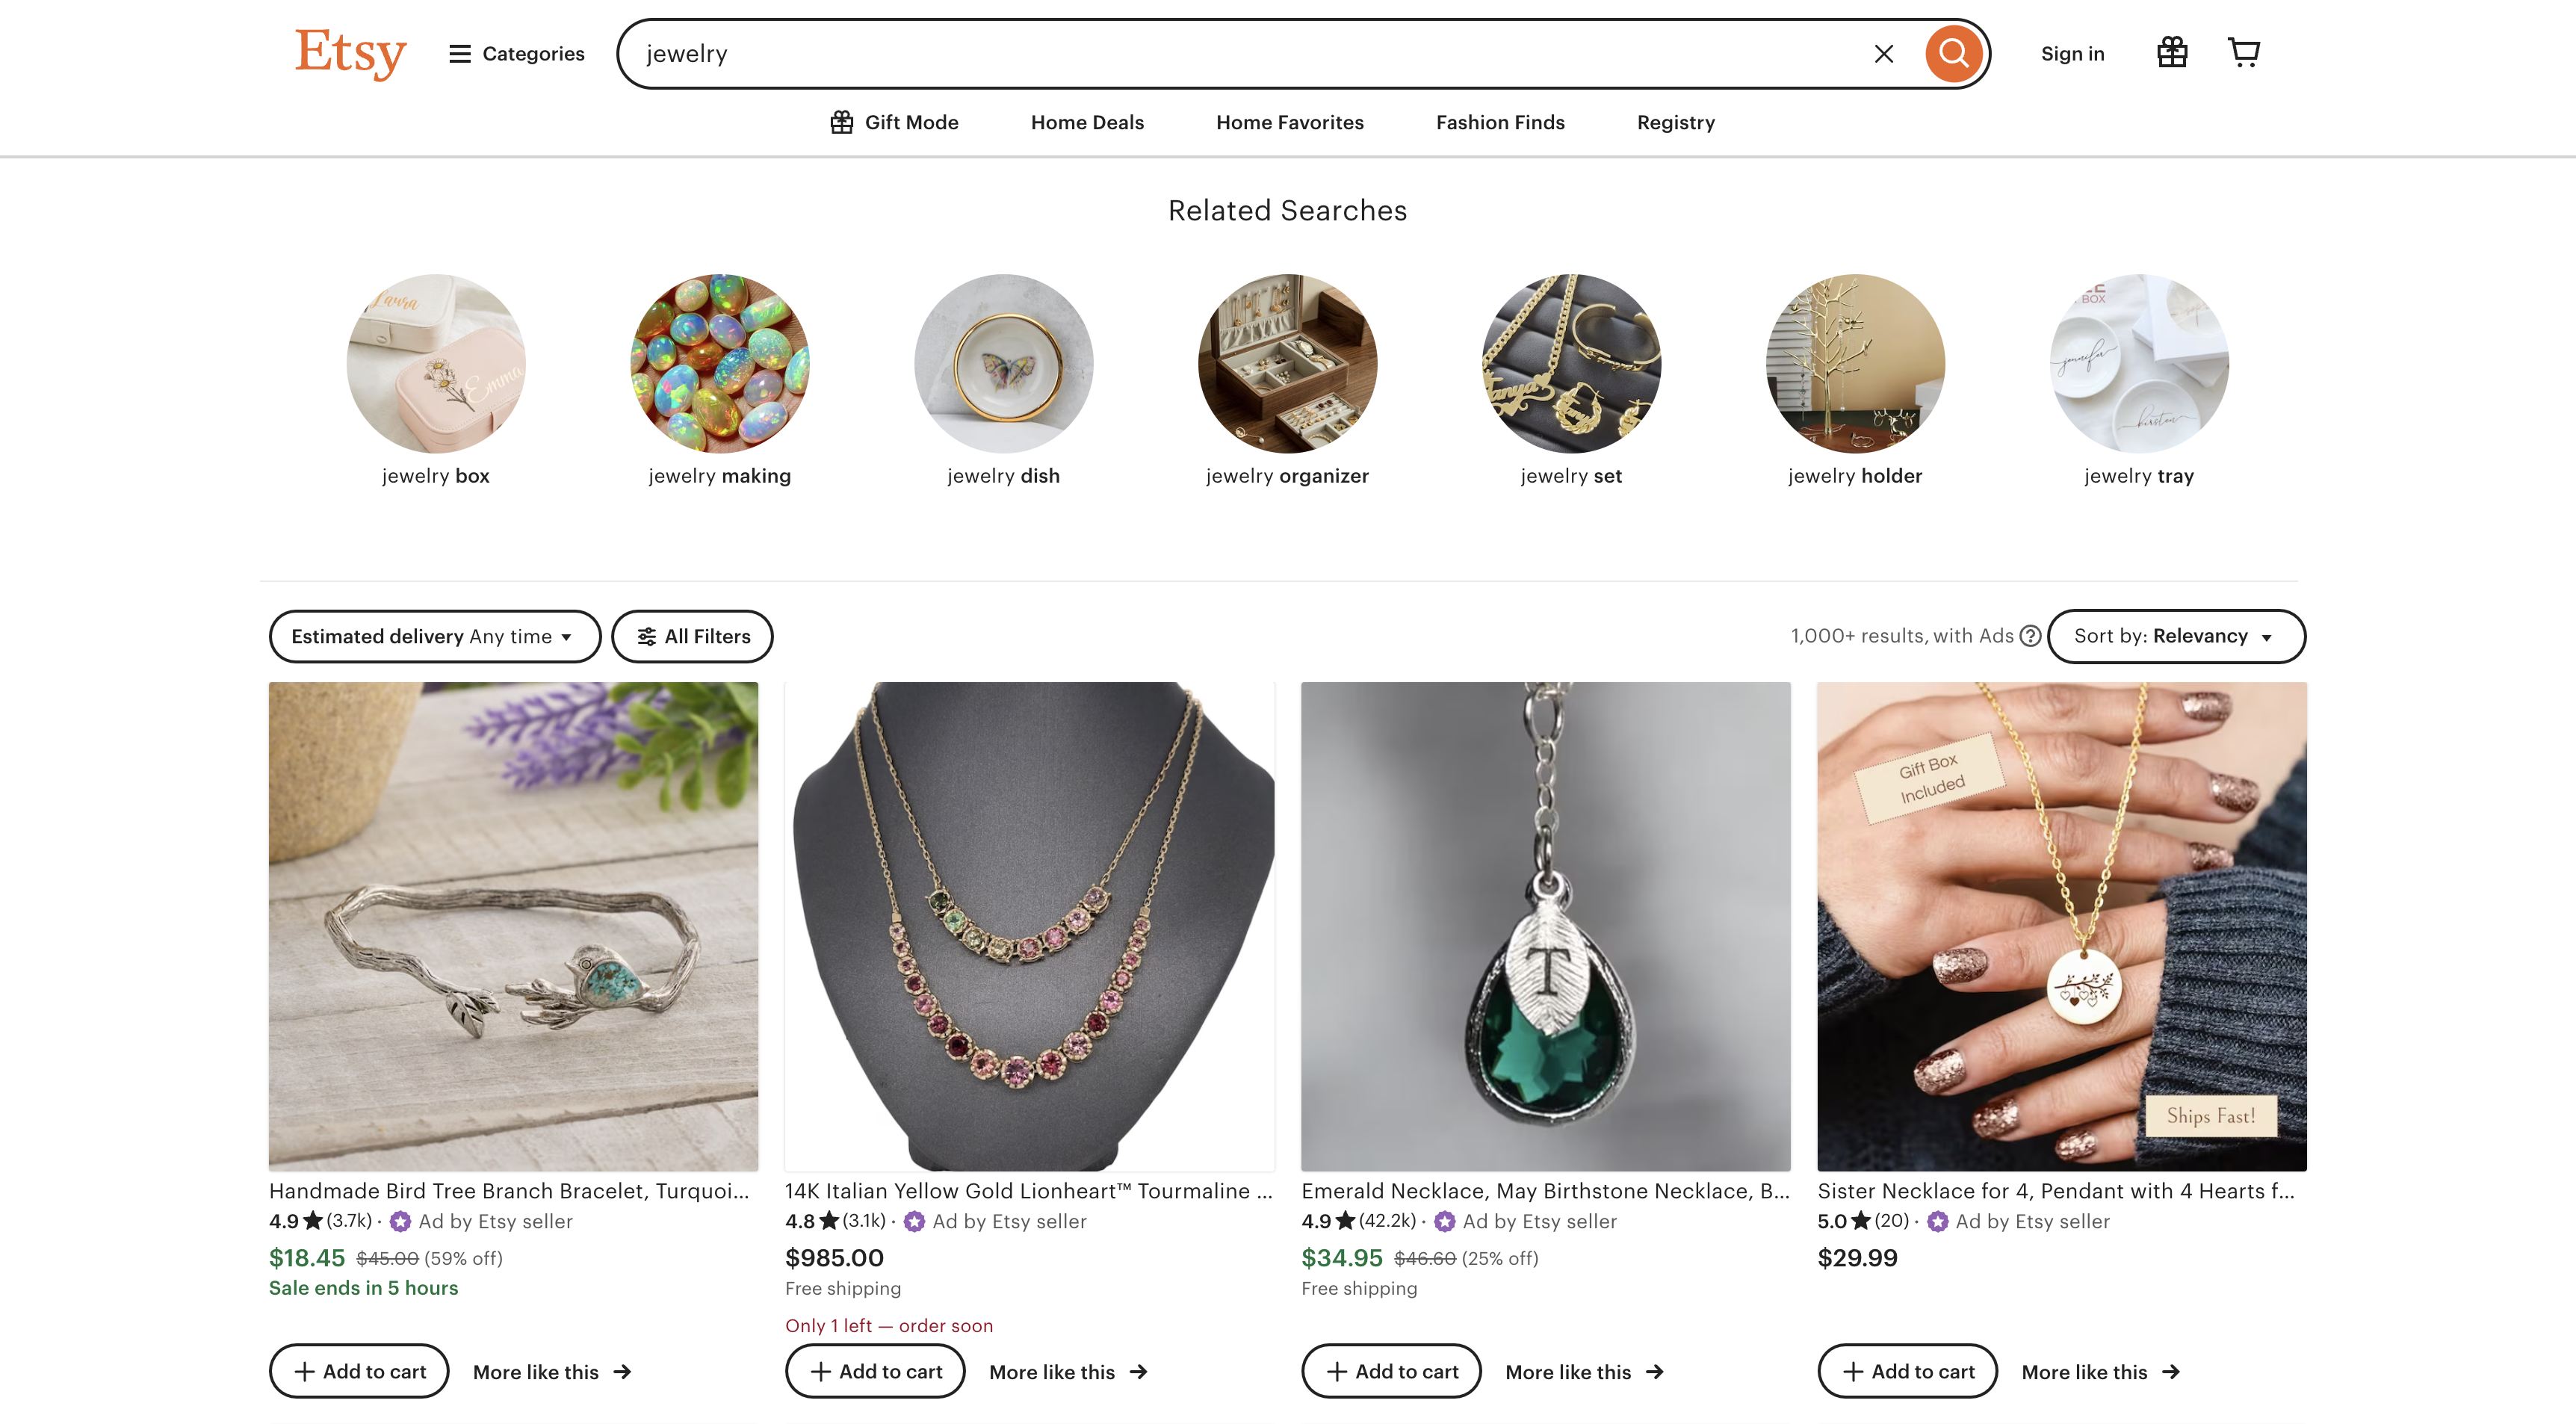

#### In a meticulous examination of Etsy's bustling "jewelry" category, our project illuminates the nuanced marketplace dynamics, spotlighting pricing strategies, customer satisfaction metrics, and the strategic use of incentives. Here's what we've uncovered:

#### **There is a Striking Embrace of Discounts**. Among the myriad of listings analyzed, a significant portion leverages discounts, with an average discount rate revealing a marketplace in keen competition. This penchant for price adjustments not only illustrates the sellers' agility in attracting buyers but also reflects a broader strategy to stand out in an ocean of unique offerings. 

#### **Stellar ratings do not automatically translate to higher review volumes**. Delving deeper into customer feedback, we found that high ratings are a common thread, with most products boasting an impressive average rating. Yet, the correlation between high ratings and review counts is less direct than one might assume, indicating that stellar ratings do not automatically translate to higher review volumes. And it suggests that exceptional quality and unique product offerings are paramount in securing customer satisfaction.

#### **Free shipping does not significantly sway customer ratings.** A considerable number of listings offer free shipping, a tactic commonly employed to entice buyers. However, our analysis reveals that while prevalent, free shipping does not significantly sway customer ratings. 

#### **There are Diverse Tactics in a Creative Marketplace**. Our project not only peels back the layers of Etsy's "jewelry" category to reveal the pricing and marketing strategies at play but also highlights the marketplace's vibrant spirit of creativity and individuality. Sellers navigate the competitive landscape with a blend of tactical pricing, quality offerings, and targeted incentives, all while maintaining the unique charm that sets Etsy apart.

#### This exploration into Etsy's "jewelry" category not only demystifies the current state of affairs but also celebrates the marketplace's commitment to fostering a diverse and dynamic platform where creativity, craftsmanship, and customer satisfaction intertwine.


In [139]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
from collections import Counter
import re

## Import Datasets

#### **Dataset Overview**
#### The dataset underpinning this analysis was meticulously curated from Etsy's "jewelry" category, leveraging web scraping techniques to extract detailed product information. 

#### **Collection Date and Scope**
#### Data was collected on **March 17**, reflecting a snapshot of the marketplace at that time. To manage the scope of the project and ensure depth of analysis, the collection focused exclusively on the first page of listings within the "jewelry" category. This approach provided a representative sample of the current offerings and trends.

#### **Variables**
#### 'Names', 'Original Prices', 'Current Prices', 'Discounts', 'Ratings', 'Review Counts', 'Free Shipping', 'URLs'

In [140]:
df = pd.read_csv("/Users/aolyu/Documents/GitHub/qtm531spring2024/Assignment/midsemester_project/products_full_info_final.csv")
df

Names  Original Prices  \
0   Monogram Leather Apple Watch Band 42mm 44mm 45...            56.86   
1   Classic Gold Stackable Ring(s), 14k Gold Fille...            20.60   
2   Raw Peridot 925 Sterling Silver Ring Mothers D...           109.99   
3   Dainty Pear Emerald Necklace Earrings Jewelry ...            69.99   
4   Custom Name Stethoscope Necklace | Medical Stu...            50.99   
..                                                ...              ...   
59  Minimalist Wedding Band, Diamond Wedding Ring,...           131.00   
60  Turquoise Leaf Earrings, Art Nouveau, Arts and...              NaN   
61  Rose Gold Delicate Necklace with Tiny Beads, E...            38.52   
62  SALE Large Gold Wrap ring, 14K Gold Fill wrapa...            68.00   
63  Pearl Jewelry Set, Pearl Bridal Jewelry, Pearl...            65.00   

    Current Prices  Discounts  Ratings Review Counts  Free Shipping  \
0            19.90  (65% off)   4.7763       (4,153)            NaN   
1            14.42  (30% off)   4.8968      (37,237)            NaN   
2            33.00  (70% off)   4.4401       (1,127)  FREE shipping   
3            41.99  (40% off)   4.7625       (6,117)  FREE shipping   
4            40.79  (20% off)   4.8462       (4,148)            NaN   
..             ...        ...      ...           ...            ...   
59           98.25  (25% off)   4.8529       (6,868)  FREE shipping   
60           26.53        NaN   4.8645      (41,919)  FREE shipping   
61           34.67  (10% off)   4.8902      (14,656)            NaN   
62           57.80  (15% off)   4.8319      (16,357)  FREE shipping   
63           45.50  (30% off)   4.8803      (31,055)  FREE shipping   

                                                 URLs  
0   https://www.etsy.com/listing/770851368/monogra...  
1   https://www.etsy.com/listing/244810634/classic...  
2   https://www.etsy.com/listing/1443011108/raw-pe...  
3   https://www.etsy.com/listing/1637877329/dainty...  
4   https://www.etsy.com/listing/546844015/custom-...  
..                                                ...  
59  https://www.etsy.com/listing/568749201/minimal...  
60  https://www.etsy.com/listing/236815596/turquoi...  
61  https://www.etsy.com/listing/463811549/rose-go...  
62  https://www.etsy.com/listing/276829058/sale-la...  
63  https://www.etsy.com/listing/455592676/pearl-j...  

[64 rows x 8 columns]

## Data Cleaning

In [141]:
#df.info()
#df.describe()

In [142]:
# Handling missing values
df['Free Shipping'] = df['Free Shipping'].fillna('No Free Shipping')
df['Original Prices'] = df['Original Prices'].fillna(df['Current Prices'])
df['Discounts'] = df['Discounts'].fillna('0% off')

# Convert 'Review Counts' to numeric
df['Review Counts'] = df['Review Counts'].str.replace(r'[^\d]', '', regex=True).astype(int)

# Quick check if there are any other obvious irregularities
#df.describe(include='all'), df.isnull().sum()

## Price Analysis

In [143]:
df['Discount Percentage'] = df['Discounts'].str.extract(r'(\d+)%').astype(float) 

# Calculate average discount percentage
average_discount_percentage = df['Discount Percentage'].mean()

# Calculate the average original and current prices
average_original_price = df['Original Prices'].mean()
average_current_price = df['Current Prices'].mean()

# average_discount_percentage, average_original_price, average_current_price

# round the results to 1 decimal places
average_discount_percentage = round(average_discount_percentage, 1)
average_original_price = round(average_original_price, 1)
average_current_price = round(average_current_price, 1)

# Create a dataframe for the results
results = pd.DataFrame({
    'Average Discount Percentage': [str(average_discount_percentage) + " %"],
    'Average Original Price($)': [average_original_price],
    'Average Current Price($)': [average_current_price]
})


results

Average Discount Percentage  Average Original Price($)  \
0                      21.7 %                       62.2   

   Average Current Price($)  
0                      46.7

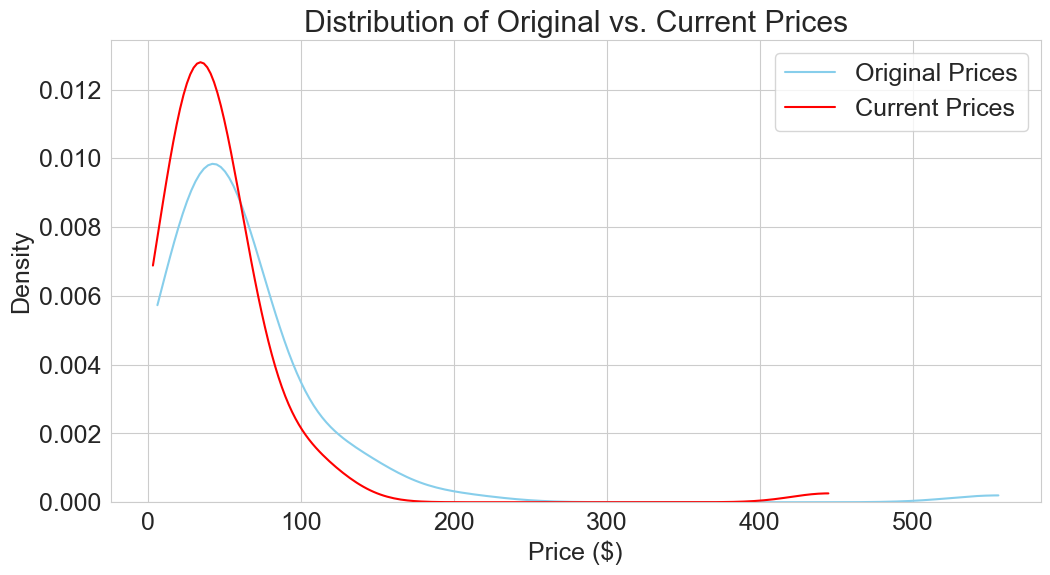

In [144]:
# sns.kdeplot(df['Original Prices'])
sns.set_style("whitegrid")
# Plot the distribution of original and current prices
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Original Prices'], color="skyblue", label='Original Prices',cut = 0)
sns.kdeplot(df['Current Prices'], color="red", label='Current Prices',cut = 0)
plt.title('Distribution of Original vs. Current Prices')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Both distributions appear to be right-skewed, indicating that a majority of the products are priced lower, with fewer products having higher prices. The overlap between the distributions suggests that while discounts have shifted some of the prices downwards (as indicated by the red distribution for current prices), the general pricing strategy targets a wide range of price points. The presence of products with high original prices that remain high even after discounts suggests a premium segment within the dataset.

#### This analysis helps in understanding that discounts are used to adjust prices across a broad spectrum of products, appealing to both budget-conscious and premium customers. The strategy appears to cater to a diverse customer base with a variety of pricing preferences.



## Ratings and Reviews Analysis

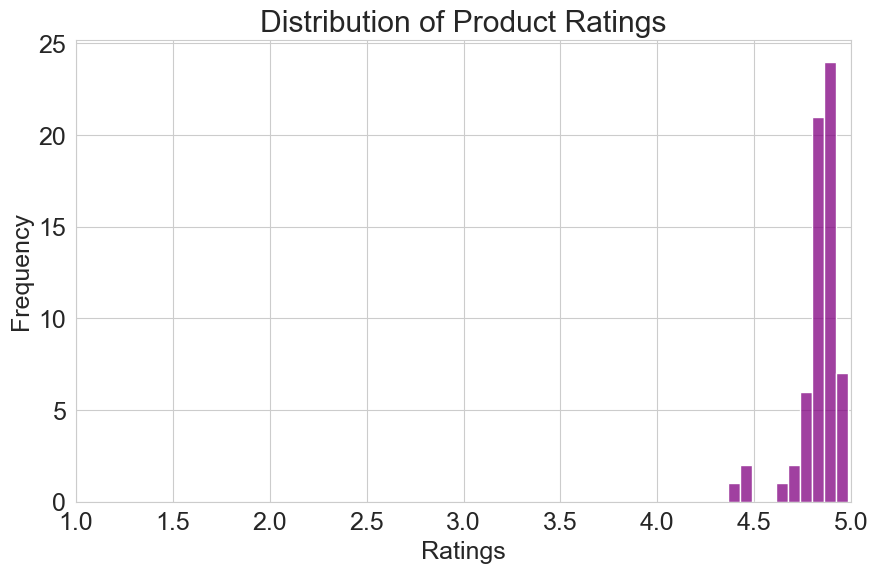

In [145]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], bins=10, color="purple")

plt.title('Distribution of Product Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xlim(1, 5)  
plt.show()

#### The ratings are predominantly high, with most products receiving a rating close to 5. This indicates a general trend of high customer satisfaction among the products in this dataset. The distribution is left-skewed, meaning there are fewer products with lower ratings, further emphasizing the trend towards higher-rated products.


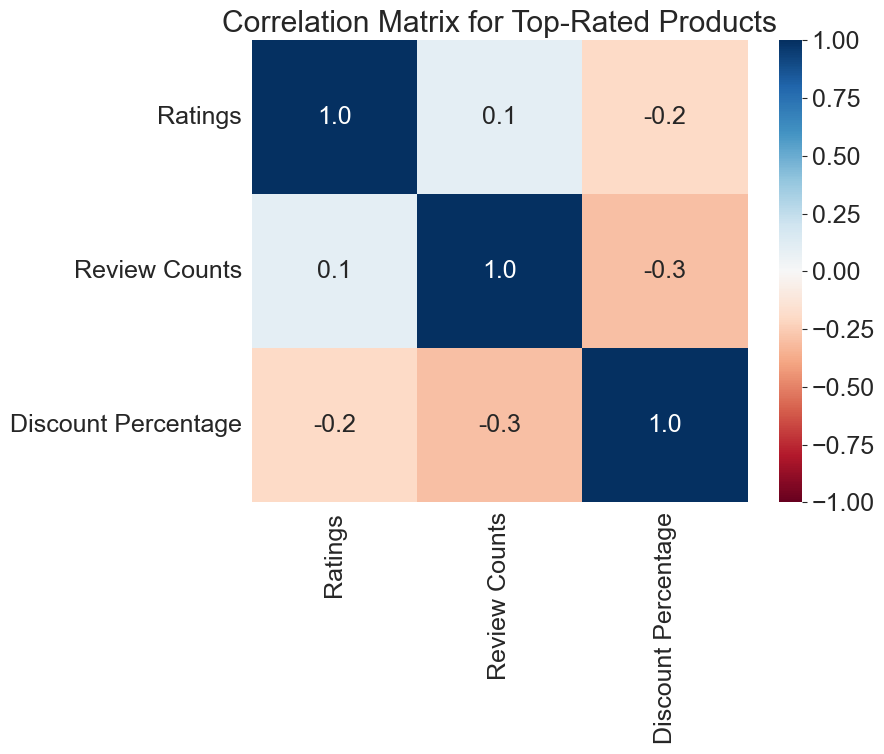

In [146]:
# Identify top-rated products (considering products with ratings >= 4.8 as top-rated for this analysis)
top_rated = df[df['Ratings'] >= 4.8]

# Calculate correlations among ratings, review counts, and discount percentage for top-rated products

correlation_matrix = top_rated[['Ratings', 'Review Counts', 'Discount Percentage']].corr(numeric_only=True)
correlation_matrix = round(correlation_matrix, 1)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".1f",vmin = -1, vmax = 1)

# change the color to skyblu


plt.set_cmap('crest_r')
# increase the font size
plt.rcParams.update({'font.size': 18})
plt.title('Correlation Matrix for Top-Rated Products')
plt.show()




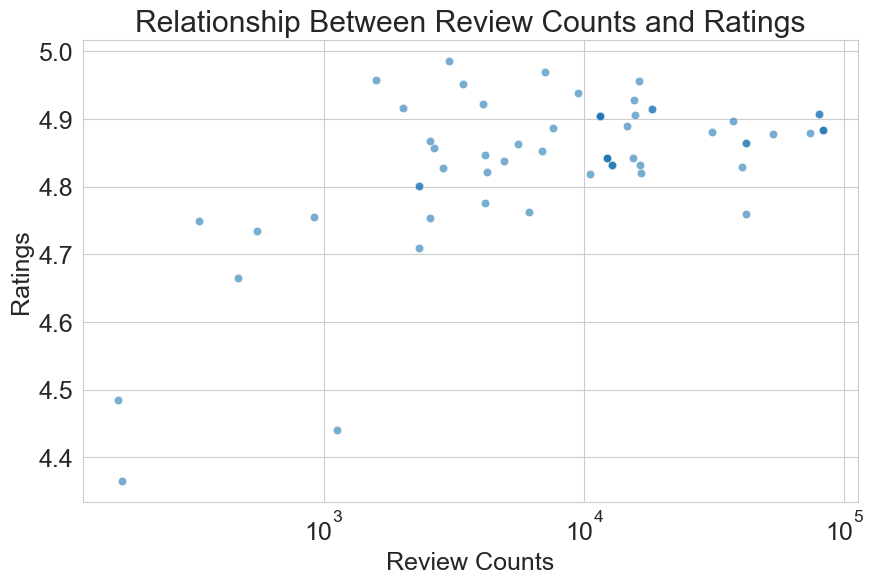

In [147]:
# Plot the relationship between review counts and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Review Counts', y='Ratings', alpha=0.6)

plt.title('Relationship Between Review Counts and Ratings')
plt.xlabel('Review Counts')
plt.ylabel('Ratings')
plt.xscale('log')  # Use logarithmic scale due to wide range of review counts
plt.show()

#### There's a broad distribution of review counts across different rating levels, indicating that products can achieve a wide range of reviews regardless of their rating. The concentration of data points towards higher ratings suggests that the majority of products are well-received, as also seen in the ratings distribution analysis.

#### There doesn't appear to be a strong linear relationship between the number of reviews and ratings. Products with a high number of reviews can have a range of ratings, though it's noteworthy that very few products with a large number of reviews have low ratings. This could imply that products with more reviews tend to be rated more positively, possibly because they are more established and have had the opportunity to refine their offerings based on customer feedback.

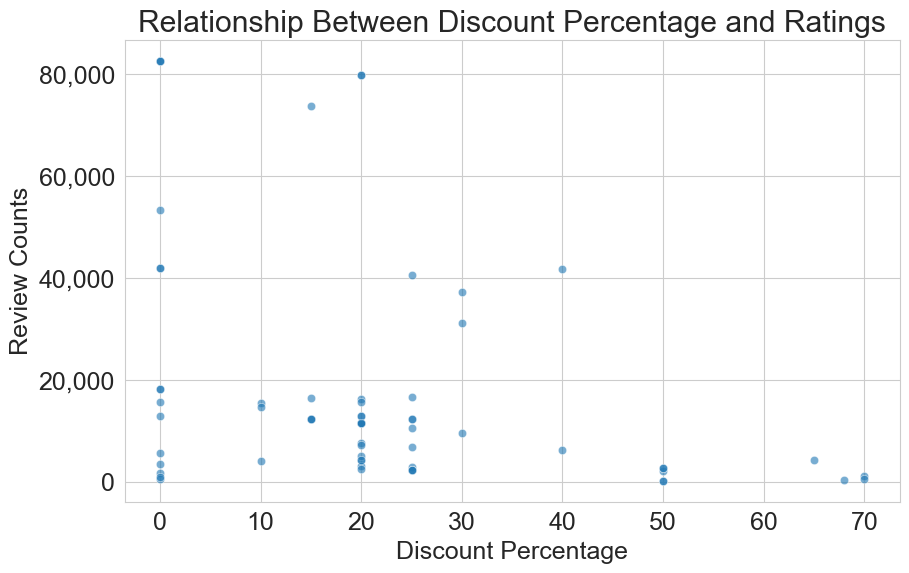

In [148]:
# Plot the relationship between discount percentage and review counts
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount Percentage', y='Review Counts', alpha=0.6)

# format the y-axis in terms of thousands
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Relationship Between Discount Percentage and Ratings')
plt.xlabel('Discount Percentage')
plt.ylabel('Review Counts')
plt.show()



#### There's a diverse distribution of review counts across the range of discount percentages, indicating that the number of reviews a product receives is not strongly dependent on the size of the discount offered.Products with a wide range of review counts are seen across all levels of discount percentages, including those with no discounts at all. This suggests that factors other than discounts may be more influential in attracting reviews.
#### While there are products with high review counts across the spectrum of discount percentages, it appears there's no clear trend that higher discounts lead to more reviews. Products can attract a significant number of reviews regardless of whether they are discounted.

## 3. Shipping Analysis

In [149]:
# Encode the 'Free Shipping' column for correlation analysis: 1 for 'FREE shipping', 0 for 'No Free Shipping'
df['Free Shipping Encoded'] = (df['Free Shipping'] == 'FREE shipping').astype(int)

# use agregrate function to calculate the average prices, ratings and review counts
average_prices_by_shipping_status = df.groupby('Free Shipping')['Current Prices'].agg('mean')
average_ratings_by_shipping_status = df.groupby('Free Shipping')['Ratings'].agg('mean')
average_review_counts_by_shipping_status = df.groupby('Free Shipping')['Review Counts'].agg('mean')

# Create a dataframe for the results
results = pd.DataFrame({
    'Average Price($)': average_prices_by_shipping_status,
    'Average Ratings': average_ratings_by_shipping_status,
    'Average Review Counts': average_review_counts_by_shipping_status
})

# round the results to 1 decimal places
results = round(results, 1)
results

Average Price($)  Average Ratings  Average Review Counts
Free Shipping                                                             
FREE shipping                 58.8              4.8                18700.7
No Free Shipping              29.1              4.8                17540.2

#### Therefore, I would like to frame some anaysis based on the Impact of Free Shipping on Product Ratings, Product Prices, and  Review Counts.

### **Hypothesis 1: Impact of Free Shipping on Product Ratings**
#### Null Hypothesis (H0): Free shipping has no impact on the average rating of products in the "jewelry" category on Etsy.

#### Alternative Hypothesis (Ha): Products with free shipping have higher average ratings than products without free shipping in the "jewelry" category on Etsy.

In [150]:
# Dependent variable: Product Ratings
y = df['Ratings']

# Independent variables: Free Shipping (plus any other variables of interest)
X = df[['Free Shipping Encoded', 'Current Prices', 'Discount Percentage']]
X = sm.add_constant(X)  

# Ordinary Least Squares (OLS) Regression
model = sm.OLS(y, X).fit()

# make robust to outliers
model_robust = model.get_robustcov_results()
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     7.554
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           0.000228
Time:                        19:11:42   Log-Likelihood:                 62.382
No. Observations:                  64   AIC:                            -116.8
Df Residuals:                      60   BIC:                            -108.1
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.90

#### The coefficient of -0.0141 with a p-value of 0.588 suggests that offering free shipping has a very small, and not statistically significant, negative impact on product ratings. This implies that free shipping does not significantly affect product ratings, and any observed effect might be due to chance.

### **Hypothesis 2: Impact of Free Shipping on Product Prices**
#### Null Hypothesis (H0): There is no difference in the average price (current or original) of products with free shipping compared to those without it in the "jewelry" category on Etsy.

#### Alternative Hypothesis (Ha): Products with free shipping are priced higher on average than those without free shipping in the "jewelry" category on Etsy.

#### This hypothesis explores whether sellers set higher prices for products with free shipping to offset the cost of shipping.

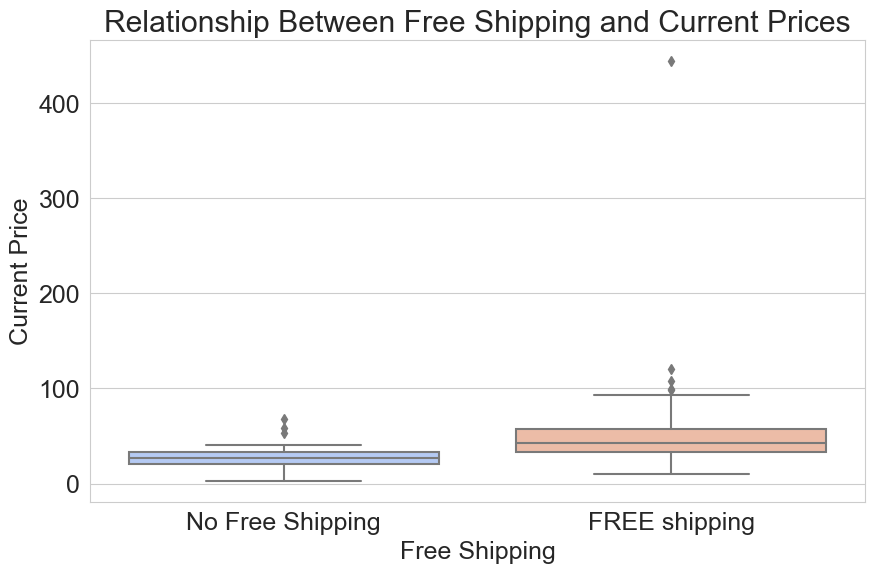

In [151]:
# Plot the relationship between free shipping and current prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Free Shipping', y='Current Prices', palette='coolwarm')

plt.title('Relationship Between Free Shipping and Current Prices')
plt.xlabel('Free Shipping')
plt.ylabel('Current Price')
plt.show()

#### We can figure out there are some outliers for the Free Shipping, so the first step is to delete these outliers.

In [152]:
# delete the outliers
outliers = model.get_influence()
outliers = outliers.summary_frame()
outliers = outliers[outliers['cooks_d'] > 4 / len(df)]
df = df.drop(outliers.index)

# Dependent variable: Product Ratings
y = df['Current Prices']

# Independent variables: Free Shipping (plus any other variables of interest)
X = df[['Free Shipping Encoded',  'Ratings','Discount Percentage']]
X = sm.add_constant(X)  

# Ordinary Least Squares (OLS) Regression
model = sm.OLS(y, X).fit()

# make robust to outliers
model_robust = model.get_robustcov_results()
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:         Current Prices   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     3.502
Date:                Thu, 28 Mar 2024   Prob (F-statistic):             0.0212
Time:                        19:11:42   Log-Likelihood:                -322.90
No. Observations:                  60   AIC:                             653.8
Df Residuals:                      56   BIC:                             662.2
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1254.10

#### Because here are a warning said that there are strong multicollinearity problem, therefore, I will check the VIF at first.

In [153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming df is your DataFrame and contains all the variables used in the model
X = df[['Free Shipping Encoded', 'Ratings', 'Discount Percentage']]
X = add_constant(X)

# Calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)


    VIF Factor               features
0  7185.705857                  const
1     1.024873  Free Shipping Encoded
2     1.262719                Ratings
3     1.238614    Discount Percentage


#### The VIF analysis indicates that multicollinearity is not a concern for my independent variables "Free Shipping Encoded," "Ratings," and "Discount Percentage." Therefore, I will just use the result above to analysis.

#### With a coefficient of 33.3890 and a p-value of 0.035, this variable is statistically significant, suggesting products with free shipping are priced about $33.39 higher than those without. This is consistent with the possibility that sellers are offsetting shipping costs through higher product prices.

## Text Analysis

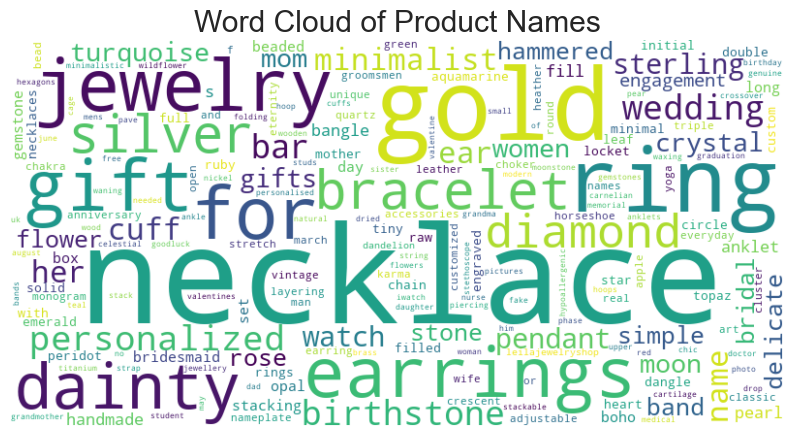

In [155]:
from collections import Counter
import re

# Function to clean and split text into words
def clean_and_split(text):
    # Remove non-alphabetic characters and split text into words
    words = re.findall(r'\b[a-z]+\b', text.lower())
    return words

# Apply the function to each product name and aggregate the results
all_words = df['Names'].apply(clean_and_split).sum()

# Count the frequency of each word
word_counts = Counter(all_words)

# Most common words
most_common_words = word_counts.most_common(10)

# Create a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Names')
plt.show()


#### These keywords suggest that the dataset is largely comprised of jewelry items, with a strong focus on necklaces, rings, earrings, and bracelets. The frequent appearance of words like "gold," "silver," and "dainty" indicates popular materials and styles. The word "gift" suggests that these products are often marketed as gifts.